<a href="https://colab.research.google.com/github/nilberthsouza/Synthetic-Financial-Datasets-For-Fraud-Detection/blob/master/edaTheseAndModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

#!pip install --upgrade pandas
#!pip install category_encoders
from category_encoders.one_hot import OneHotEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("sample_data/synt.csv")
print(df.tail())

        step      type     amount  ... newbalanceDest  isFraud  isFlaggedFraud
314694    16  CASH_OUT  359950.11  ...     2717203.17      0.0             0.0
314695    16   PAYMENT    4032.79  ...           0.00      0.0             0.0
314696    16   CASH_IN  114371.60  ...      633156.15      0.0             0.0
314697    16   PAYMENT   13415.82  ...           0.00      0.0             0.0
314698    16   CASH_IN      65.00  ...            NaN      NaN             NaN

[5 rows x 11 columns]


In [3]:
df['varoldbalanceOrg'] = df.amount/df['oldbalanceOrg']
df['varoldbalanceDest'] = df.amount/df['oldbalanceDest']


df.varoldbalanceOrg.fillna(1,inplace=True)
df.varoldbalanceDest.fillna(1,inplace=True)

#certifica que celulas não fiquem com valor inf 
df.varoldbalanceOrg = df.varoldbalanceOrg.map(lambda a: 1 if a == np.inf else a)
df.varoldbalanceDest = df.varoldbalanceDest.map(lambda a: 1 if a == np.inf else a)

df.dropna(inplace=True)
df.isnull().sum()

step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
varoldbalanceOrg     0
varoldbalanceDest    0
dtype: int64

In [0]:

df.drop(['step','nameOrig','nameDest'],axis=1,inplace=True)

In [0]:
enc = OneHotEncoder(cols=['type'], use_cat_names=True)
enc.fit(df)
df = enc.transform(df)


In [11]:
import time
start = time.time()

df['maiormenor'] = 0
maxminvalue = df.amount[df.isFraud == 1].max()
minvalue = df.amount.min()

for i in range(len(df.isFraud)):
    if df['amount'][i] < (maxminvalue + minvalue):
        df['maiormenor'][i] = 1
    else:
        df['maiormenor'][i] = 0
end = time.time()
print(end-start)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


36.546653032302856


In [12]:
df = df.sample(frac=1)
df = df.sample(frac=1)
df = df.sample(frac=1)
df.reset_index(inplace=True)
X_train, X_test , y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1),df['isFraud'],test_size=0.3, random_state=0)

print(len(X_train),len(X_test),len(y_train),len(y_test))

220288 94410 220288 94410


In [0]:
df = df.sample(frac=1)
df = df.sample(frac=1)
df = df.sample(frac=1)
df.reset_index(inplace=True)
X_train, X_test , y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1),df['isFraud'],test_size=0.3, random_state=0)

print(len(X_train),len(X_test),len(y_train),len(y_test))



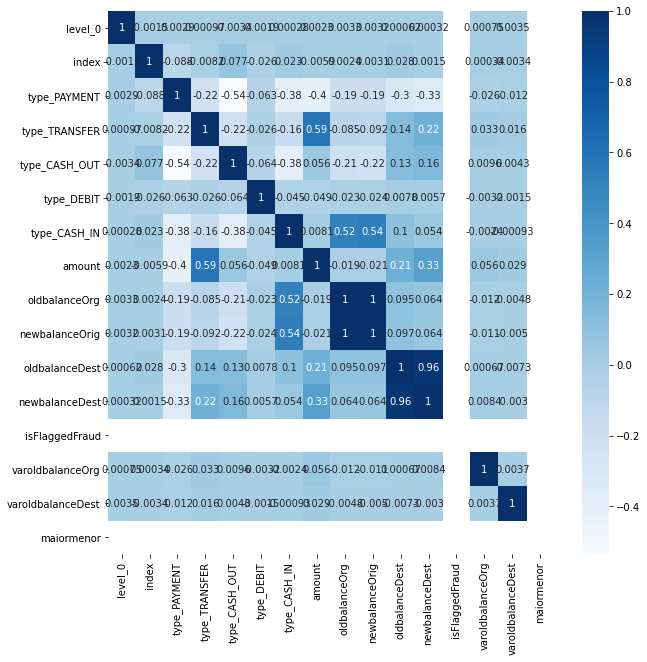

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0db0ab30f0>,
      dtype=object)

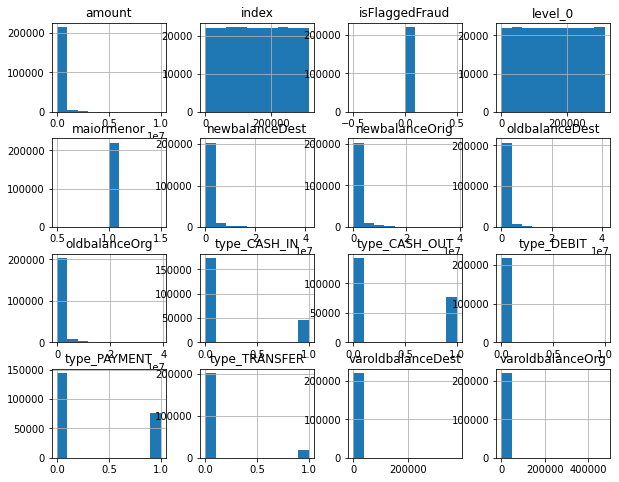

In [16]:
X_train.hist(figsize=(10,8))

In [0]:
sns.scatterplot(x = train.oldbalanceDest,y=train.newbalanceDest,hue=df.isFraud)


In [0]:
sns.scatterplot(x=df['varoldbalanceOrg'],y=df['varoldbalanceDest'],hue=df.isFraud)

In [0]:

model = LogisticRegression()
model.fit(X_train,y_train)

modelOnePredictions = model.predict(X_test)



classification_report( y_test, modelOnePredictions)

In [0]:


accuracy_score(y_test,modelOnePredictions)